# Importing all moldules

In [50]:
import alpha_vantage
import pandas
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime

# CLASS ScriptData

In [51]:
class ScriptData(dict):

    global libray 
    libray = dict()

    def __getitem__(self,key):
        #print(type(lb[key]))
        #print(libray[key])
        return libray[key]


    def __setitem__(self, i, o):
        pass
    
    
    
    def __contains__(self, o):
        for key in libray.keys():
            if key == o:
                return True
            
        return False
    
    # __init__ function
    # def __init__(self):
    #     self = Userdict()


    def fetch_intraday_data(self,script):
        key = 'XTP4AMN2N5H9BL51'
        ts = TimeSeries(key,output_format='pandas')
        global data ,meta 
        data, meta = ts.get_intraday(script,interval='1min',outputsize='full')


    def convert_intraday_data(self,script):
        columns=['open','high','low','close','volumn']
        data.columns = columns
        data['timestamp']=data.index
        data.reset_index(drop=True, inplace=True)
        #data['timestamp']=data.index
        libray[script]=data
        #self['GOOGL'] = data
        #print(self[script])




    

In [52]:
script_data = ScriptData()

In [53]:
script_data.fetch_intraday_data('GOOGL')

In [54]:
script_data.convert_intraday_data('GOOGL')

In [55]:
script_data['GOOGL']

,open,high,low,close,volumn,timestamp
0,86.19,86.1999,86.19,86.19,2157.0,2022-12-28 20:00:00
1,86.19,86.2000,86.19,86.20,725.0,2022-12-28 19:59:00
2,86.19,86.1900,86.19,86.19,453.0,2022-12-28 19:57:00
3,86.18,86.1800,86.18,86.18,364.0,2022-12-28 19:53:00
4,86.17,86.1800,86.17,86.18,712.0,2022-12-28 19:52:00
...,...,...,...,...,...,...
5407,93.38,93.3800,93.34,93.34,605.0,2022-12-15 04:06:00
5408,93.31,93.5000,93.31,93.36,1658.0,2022-12-15 04:05:00
5409,93.45,93.4500,93.25,93.31,2008.0,2022-12-15 04:04:00
5410,93.49,93.5100,93.45,93.45,992.0,2022-12-15 04:03:00


In [56]:
script_data.fetch_intraday_data('AAPL')

In [57]:
script_data.convert_intraday_data('AAPL')

In [58]:
script_data['AAPL']

,open,high,low,close,volumn,timestamp
0,126.3000,126.3200,126.2901,126.3200,1627.0,2022-12-28 20:00:00
1,126.2900,126.3000,126.2900,126.3000,2079.0,2022-12-28 19:59:00
2,126.2900,126.2900,126.2700,126.2700,3318.0,2022-12-28 19:58:00
3,126.2900,126.2900,126.2701,126.2800,2219.0,2022-12-28 19:57:00
4,126.2600,126.2800,126.2600,126.2800,2412.0,2022-12-28 19:56:00
...,...,...,...,...,...,...
7341,141.3114,141.3313,141.1815,141.1815,2117.0,2022-12-15 04:05:00
7342,141.3213,141.3213,141.1316,141.1516,6494.0,2022-12-15 04:04:00
7343,141.5710,141.5710,141.3114,141.3313,3624.0,2022-12-15 04:03:00
7344,141.6210,141.8207,141.5710,141.5710,6461.0,2022-12-15 04:02:00


In [59]:
'GOOGL' in script_data

True

In [60]:
'AAPL' in script_data 

True

In [61]:
'UNCLE' in script_data

False

# Indicator method


In [62]:
def indicator1(df,timeperiod=10):
    df1 = pandas.DataFrame()
    df1['indicator'] = df['close'].rolling(timeperiod).mean()
    # removing all the NULL values using
    # dropna() method
    df1.dropna(inplace=True)
    return df1

In [63]:
indicator1(script_data['GOOGL'], timeperiod=5)

,indicator
4,86.188
5,86.186
6,86.172
7,86.138
8,86.122
...,...
5407,93.382
5408,93.384
5409,93.364
5410,93.372


In [64]:
indicator1(script_data['AAPL'], 5)

,indicator
4,126.29000
5,126.28200
6,126.27800
7,126.28000
8,126.28000
...,...
7341,141.30534
7342,141.23944
7343,141.22146
7344,141.27140


In [65]:

class Strategy(ScriptData):
    
    def __init__(self,script):
        self.script = script


    def get_script_data(self):
        self.fetch_intraday_data(self.script)
        self.convert_intraday_data(self.script)
        global df
        global indicator_data
        df = data['close'].to_frame()
        df['timestamp'] = data['timestamp']
        df['indicator_data'] = indicator1(df,5)

        

    def get_signals(self):
        
        signals = df
        signals['signal'] = np.nan
        for i in range(len(df)):
            if df.iloc[i-1]['close']>df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] < df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'BUY'
            elif df.iloc[i-1]['close'] < df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] > df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'SELL'
            else:
                signals['signal'][i] = 'No_Signal'

        return signals[['timestamp','signal']]
        
        
    def plot(self):
        df2 = df['timestamp'].to_frame()
        df2['df_close'] = df['close']            
        df2['indicator_data']= indicator_data['indicator']
        plt.plot(df2['timestamp'],df2['df_close'],color='red')
        plt.plot(df2['timestamp'],df2['indicator_data'],color='navy')
        
    
    
        
        
        
         
            
            
        
        
        


In [66]:
strategy = Strategy('NVDA')
strategy.get_script_data()

In [67]:
strategy.get_signals()

,timestamp,signal
0,2022-12-28 20:00:00,No_Signal
1,2022-12-28 19:59:00,No_Signal
2,2022-12-28 19:56:00,No_Signal
3,2022-12-28 19:55:00,No_Signal
4,2022-12-28 19:53:00,No_Signal
...,...,...
6161,2022-12-15 04:06:00,No_Signal
6162,2022-12-15 04:04:00,No_Signal
6163,2022-12-15 04:03:00,SELL
6164,2022-12-15 04:02:00,No_Signal


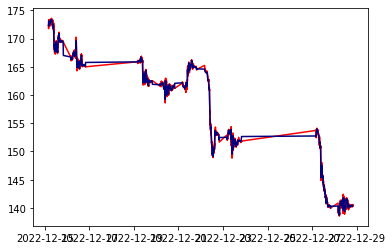

In [68]:
strategy.plot()